In [3]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


### Importing required Libraries 

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Loading the Datasets

In [5]:
# Loading the datasets 
train = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
sample = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv")
test = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")

In [6]:
train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [7]:
test.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.0
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.0
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.0


In [8]:
sample.head()

,ID,total_amount
0,1,24.456348
1,2,24.374058
2,3,19.878154
3,4,25.015569
4,5,22.252489


### Exploratory Data Analysis (EDA)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [10]:
train.groupby(['store_and_fwd_flag']).count()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
store_and_fwd_flag,,,,,,,,,,,,,,,,
N,167729,167729,167729,167729,167729,167729,167729,167729,167729,167729,167729,167729,167729,167729,167729,167729
Y,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194


In [11]:
train.groupby(['payment_type']).count()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
payment_type,,,,,,,,,,,,,,,,
Cash,30141,30141,30141,30141,30141,30141,30141,30141,30141,30141,30141,30141,30141,30141,30141,30141
Credit Card,135257,135257,135257,135257,135257,135257,135257,135257,135257,135257,135257,135257,135257,135257,135257,135257
UPI,1192,1192,1192,1192,1192,1192,1192,1192,1192,1192,1192,1192,1192,1192,1192,1192
Wallet,6077,6077,6077,0,6077,0,0,6077,6077,6077,6077,6077,6077,6077,0,0
unknown,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333


In [12]:
# Converting tpep_pickup_datetime' and 'tpep_dropoff_datetime' columns of train dataset to a datetime format
train['tpep_pickup_datetime'] = pd.to_datetime(train['tpep_pickup_datetime'])
train['tpep_dropoff_datetime'] = pd.to_datetime(train['tpep_dropoff_datetime'])

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               175000 non-null  int64         
 1   tpep_pickup_datetime   175000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  175000 non-null  datetime64[ns]
 3   passenger_count        168923 non-null  float64       
 4   trip_distance          175000 non-null  float64       
 5   RatecodeID             168923 non-null  float64       
 6   store_and_fwd_flag     168923 non-null  object        
 7   PULocationID           175000 non-null  int64         
 8   DOLocationID           175000 non-null  int64         
 9   payment_type           175000 non-null  object        
 10  extra                  175000 non-null  float64       
 11  tip_amount             175000 non-null  float64       
 12  tolls_amount           175000 non-null  floa

In [14]:
# Converting tpep_pickup_datetime' and 'tpep_dropoff_datetime' columns of test dataset to a datetime format
test['tpep_pickup_datetime'] = pd.to_datetime(test['tpep_pickup_datetime'])
test['tpep_dropoff_datetime'] = pd.to_datetime(test['tpep_dropoff_datetime'])

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               50000 non-null  int64         
 1   tpep_pickup_datetime   50000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  50000 non-null  datetime64[ns]
 3   passenger_count        48221 non-null  float64       
 4   trip_distance          50000 non-null  float64       
 5   RatecodeID             48221 non-null  float64       
 6   store_and_fwd_flag     48221 non-null  object        
 7   PULocationID           50000 non-null  int64         
 8   DOLocationID           50000 non-null  int64         
 9   payment_type           50000 non-null  object        
 10  extra                  50000 non-null  float64       
 11  tip_amount             50000 non-null  float64       
 12  tolls_amount           50000 non-null  float64       
 13  i

In [16]:
train.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,175000,175000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,2023-06-29 20:08:41.719628544,2023-06-29 20:26:35.299731712,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
min,0.000000,2023-06-28 15:26:39,2023-06-28 15:32:43,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,2023-06-29 08:19:04,2023-06-29 08:33:55.750000128,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,2023-06-29 19:03:37.500000,2023-06-29 19:21:36,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,2023-06-30 12:33:12.500000,2023-06-30 12:52:20.249999872,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,2023-07-01 00:58:11,2023-07-01 23:10:43,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000
std,0.445606,NaN,NaN,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968


In [17]:
# Feature Engineering
# Calculating the duration of taxi trips by finding the absolute difference between drop-off and pick-up datetimes, converting it to seconds, and storing it in a new 'duration' column 
def calculate_duration(df):
    duration = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
    duration_in_seconds = duration.dt.total_seconds().abs()
    df['duration'] = duration_in_seconds
    return df

# Add the duration column to the training and testing dataframes
train = calculate_duration(train)
test = calculate_duration(test)

In [18]:
train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,2736.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,3806.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,3219.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,3412.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,1130.0


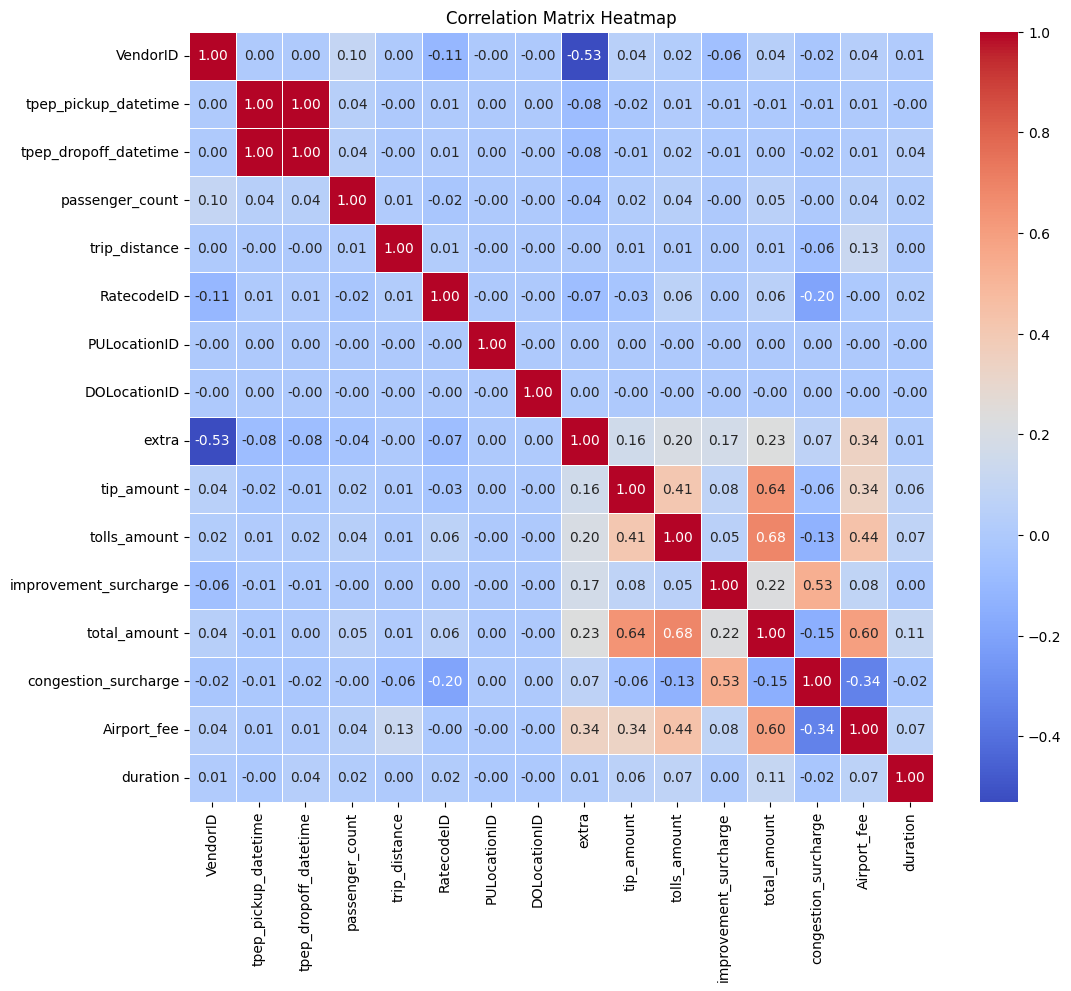

In [19]:
numerical_df = train.select_dtypes(exclude='object')

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix heatmap with annotations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
train.drop(['PULocationID','DOLocationID'], axis=1, inplace=True)
test.drop(['PULocationID','DOLocationID'], axis=1 ,inplace=True)

In [21]:
train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,2736.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,3806.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,3219.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,3412.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,1130.0


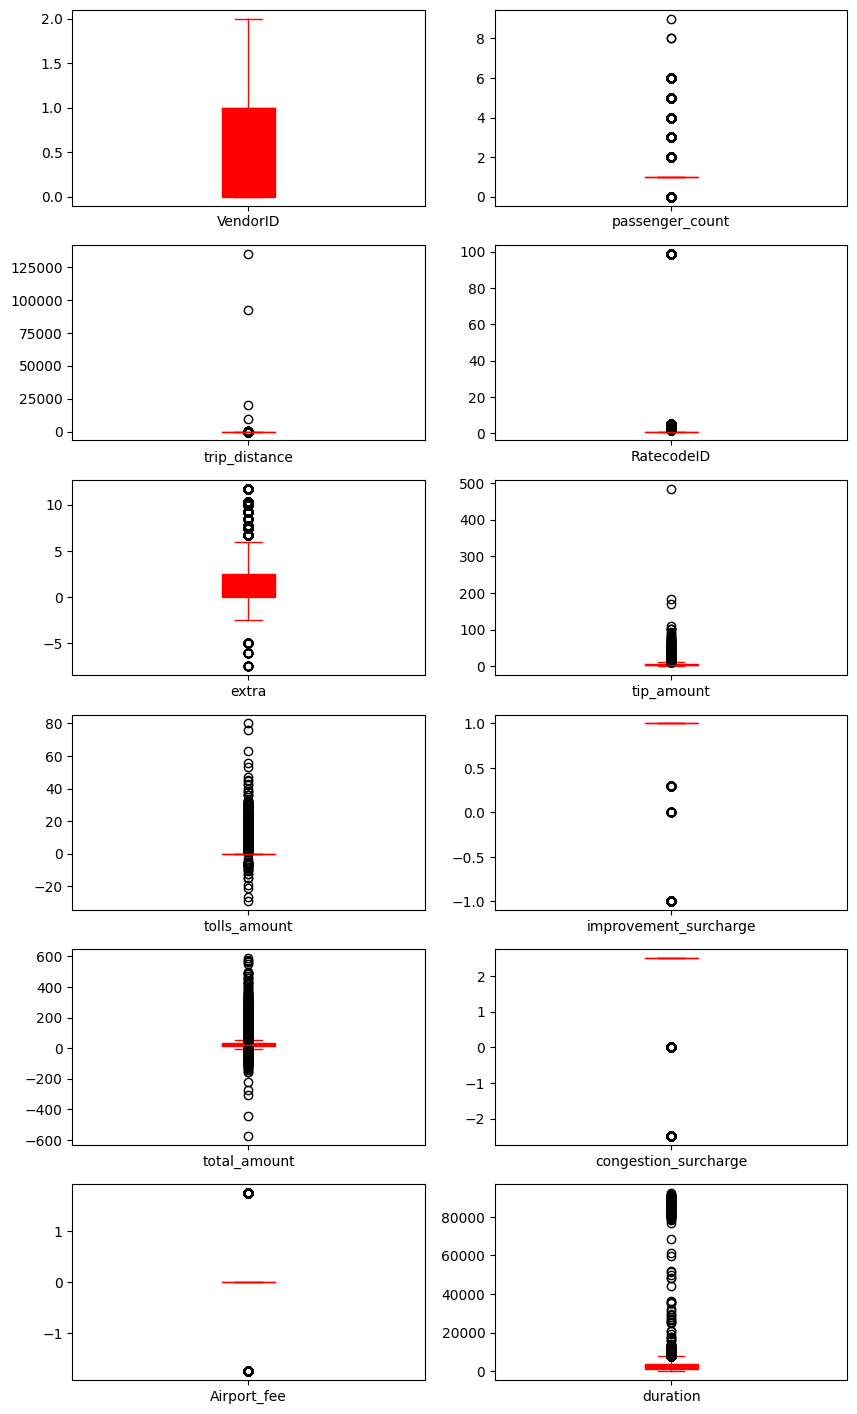

In [22]:
# Box plots for each column in the 'train' dataset
train.plot(kind='box',sharey = False, subplots=True, color='red',layout=(10,2),figsize=(10,30),patch_artist=True,return_type='both')
plt.show()

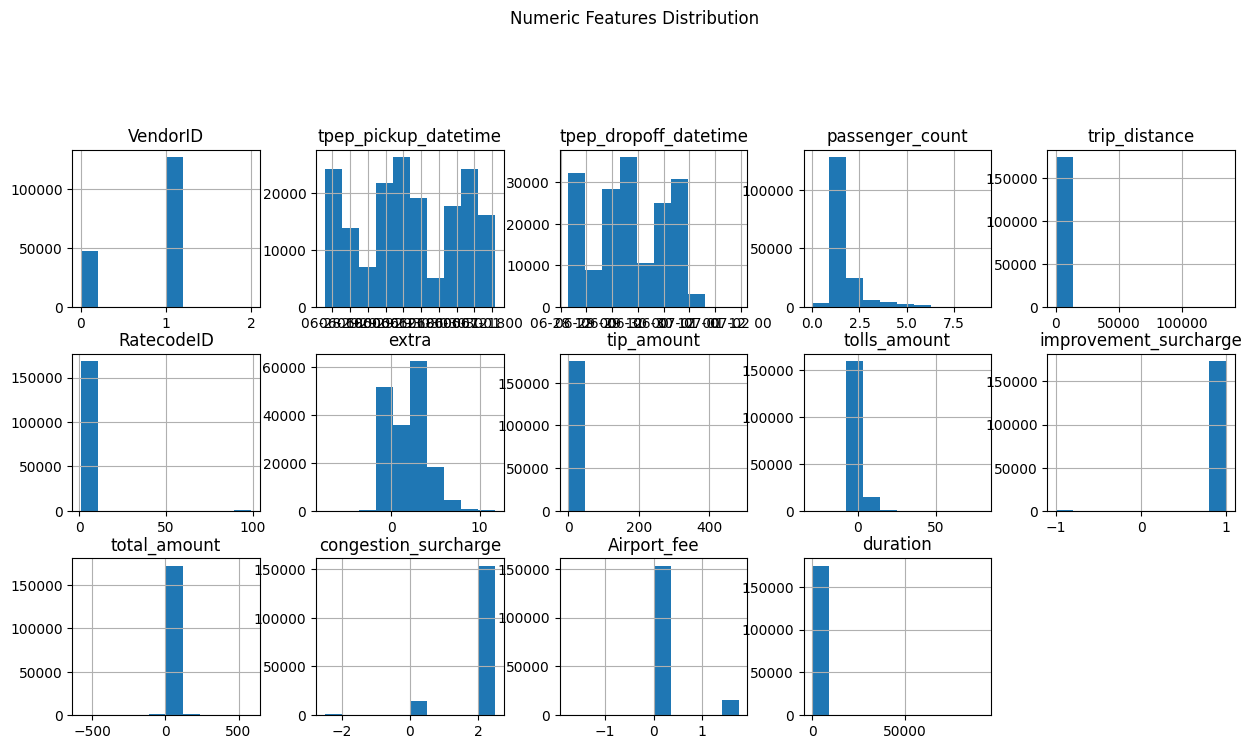

In [23]:
# Histogram for numeric fearures  
num_df = train.select_dtypes(exclude=['object', 'datetime64[ns]'])

train.hist(bins=10, figsize=(15, 10), layout=(4,5))
plt.suptitle('Numeric Features Distribution', y=1.02)
plt.show()

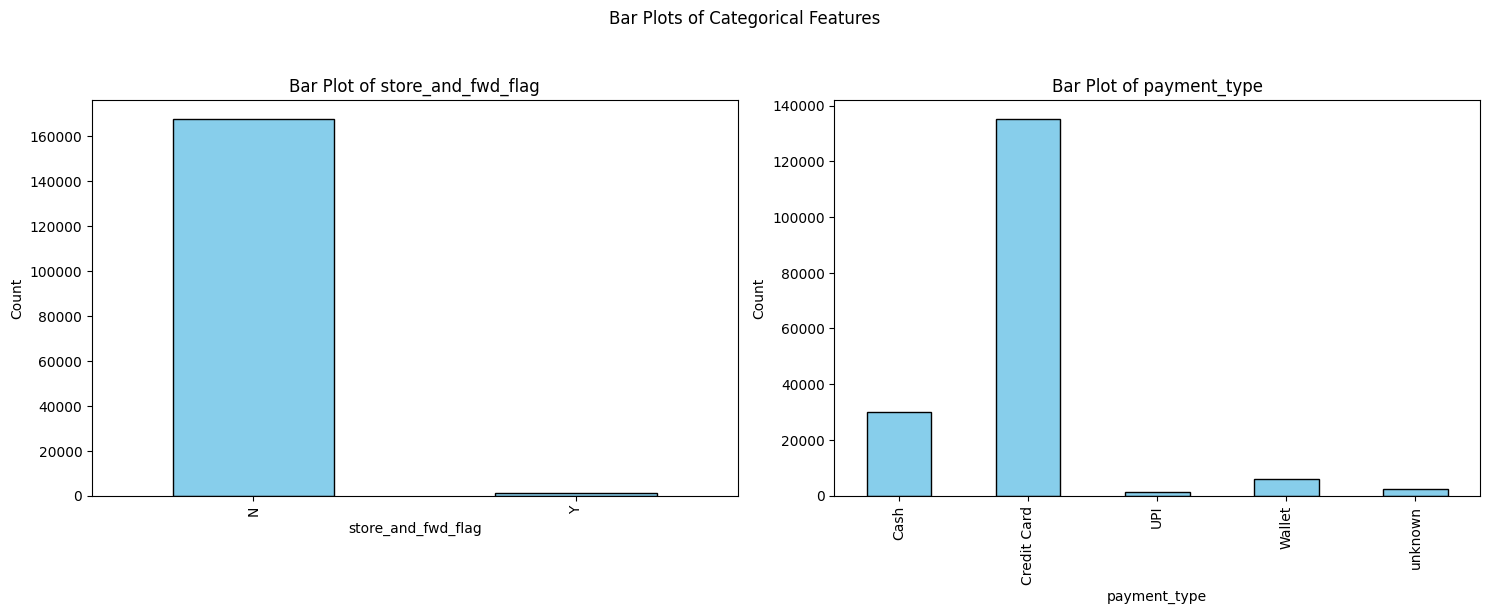

In [24]:
# Bar plots for categorical features

categorical_feature = ['store_and_fwd_flag', 'payment_type']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_feature, 1):
    plt.subplot(2, 2, i)
    train[feature].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.suptitle('Bar Plots of Categorical Features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

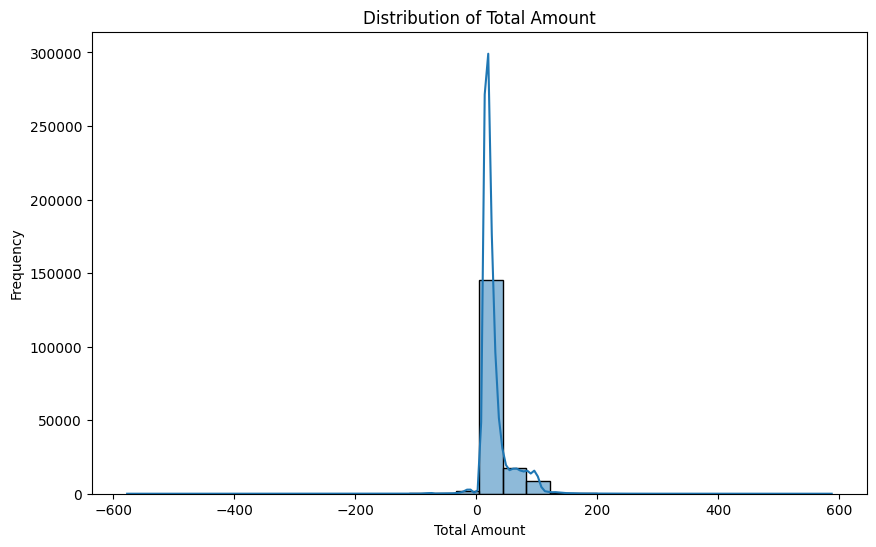

In [25]:
# Plot distribution of the target variable

plt.figure(figsize=(10, 6))
sns.histplot(train['total_amount'], bins=30, kde=True)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Extracting the pickup day, month, hour and minute from 'tpep_pickup_datetime' column from train dataset
train['pickup_day_of_week'] = train['tpep_pickup_datetime'].dt.dayofweek
train['pickup_month'] = train['tpep_pickup_datetime'].dt.month
train['pickup_hour'] = train['tpep_pickup_datetime'].dt.hour
train['pickup_minute'] = train['tpep_pickup_datetime'].dt.minute

In [27]:
# Extracting the dropoff day, month, hour and minute from 'tpep_dropoff_datetime' column from train dataset
train['dropoff_day_of_week'] = train['tpep_dropoff_datetime'].dt.dayofweek
train['dropoff_month'] = train['tpep_dropoff_datetime'].dt.month
train['dropff_hour'] = train['tpep_dropoff_datetime'].dt.hour
train['dropoff_minute'] = train['tpep_dropoff_datetime'].dt.minute

In [28]:
train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,extra,tip_amount,...,Airport_fee,duration,pickup_day_of_week,pickup_month,pickup_hour,pickup_minute,dropoff_day_of_week,dropoff_month,dropff_hour,dropoff_minute
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,Credit Card,2.5,7.165589,...,0.0,2736.0,2,6,17,20,2,6,16,34
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,Credit Card,3.5,6.067401,...,0.0,3806.0,3,6,23,5,3,6,22,1
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,Credit Card,0.0,4.111547,...,0.0,3219.0,4,6,10,19,4,6,11,13
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,Credit Card,2.5,6.411079,...,0.0,3412.0,3,6,13,23,3,6,14,20
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,Credit Card,1.0,4.769377,...,0.0,1130.0,3,6,22,3,3,6,22,22


In [29]:
# Extracting the pickup day, month, hour and minute from 'tpep_pickup_datetime' column from test dataset
test['pickup_day_of_week'] = test['tpep_pickup_datetime'].dt.dayofweek
test['pickup_month'] = test['tpep_pickup_datetime'].dt.month
test['pickup_hour'] = test['tpep_pickup_datetime'].dt.hour
test['pickup_minute'] = test['tpep_pickup_datetime'].dt.minute

In [30]:
# Extracting the dropoff day, month, hour and minute from 'tpep_dropoff_datetime' column from test dataset
test['dropoff_day_of_week'] = test['tpep_dropoff_datetime'].dt.dayofweek
test['dropoff_month'] = test['tpep_dropoff_datetime'].dt.month
test['dropff_hour'] = test['tpep_dropoff_datetime'].dt.hour
test['dropoff_minute'] = test['tpep_dropoff_datetime'].dt.hour

In [31]:
test.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,extra,tip_amount,...,Airport_fee,duration,pickup_day_of_week,pickup_month,pickup_hour,pickup_minute,dropoff_day_of_week,dropoff_month,dropff_hour,dropoff_minute
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,Credit Card,1.0,6.067612,...,0.0,240.0,3,6,0,21,3,6,0,0
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,Credit Card,2.5,6.191269,...,0.0,510.0,4,6,17,44,4,6,17,17
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,Cash,2.5,3.983872,...,0.0,4004.0,3,6,18,17,3,6,19,19
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,Credit Card,3.5,6.839341,...,0.0,747.0,4,6,21,33,4,6,21,21
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,Cash,0.0,1.468943,...,0.0,1703.0,3,6,14,53,3,6,15,15


In [32]:
# Drop original datetime columns
train = train.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)
test = test.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

In [33]:
train.isnull().sum()

VendorID                    0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
duration                    0
pickup_day_of_week          0
pickup_month                0
pickup_hour                 0
pickup_minute               0
dropoff_day_of_week         0
dropoff_month               0
dropff_hour                 0
dropoff_minute              0
dtype: int64

In [34]:
train.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'duration', 'pickup_day_of_week',
       'pickup_month', 'pickup_hour', 'pickup_minute', 'dropoff_day_of_week',
       'dropoff_month', 'dropff_hour', 'dropoff_minute'],
      dtype='object')

In [35]:
# Getting unique values from the 'payment_type' and 'store_and_fwd_flag' columns in the 'train' dataset 
p=train.payment_type.unique()
s=train.store_and_fwd_flag.unique()
l=train.shape
p,s,l

(array(['Credit Card', 'Cash', 'Wallet', 'UPI', 'unknown'], dtype=object),
 array(['N', nan, 'Y'], dtype=object),
 (175000, 22))

In [36]:
train['payment_type'].replace('unkown', np.nan, inplace=True)
test['payment_type'].replace('unkown', np.nan, inplace=True)

In [37]:
X = train.drop(['total_amount'], axis=1)
y = train['total_amount']

In [38]:
# Spliting the features (X) and target variable (y) into training and validation sets, with an 80-20 ratio
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140000 entries, 143961 to 121958
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               140000 non-null  int64  
 1   passenger_count        135159 non-null  float64
 2   trip_distance          140000 non-null  float64
 3   RatecodeID             135159 non-null  float64
 4   store_and_fwd_flag     135159 non-null  object 
 5   payment_type           140000 non-null  object 
 6   extra                  140000 non-null  float64
 7   tip_amount             140000 non-null  float64
 8   tolls_amount           140000 non-null  float64
 9   improvement_surcharge  140000 non-null  float64
 10  congestion_surcharge   135159 non-null  float64
 11  Airport_fee            135159 non-null  float64
 12  duration               140000 non-null  float64
 13  pickup_day_of_week     140000 non-null  int32  
 14  pickup_month           140000 non-nu

In [40]:
numeric_features = ['passenger_count', 'trip_distance', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']
categorical_features = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type']
datetime_features = ['pickup_day_of_week', 'pickup_month', 'pickup_hour']

In [41]:
# Defining a pipeline that sequentially applies three transformations: imputation using mean values for missing data, polynomial feature expansion to the second degree, and standard scaling to normalize the numeric data.
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler())
])

In [42]:
# Defining a pipeline for preprocessing categorical data, involving imputation of missing values using the most frequent value and performing one-hot encoding 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [43]:
# Defining a ColumnTransformer namedthat applies specific transformations (numeric_transformer, categorical_transformer, and 'passthrough' for datetime features)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('datetime', 'passthrough', datetime_features)  # 'passthrough' for datetime features
    ])

### Linear Regression (LR) Model

In [44]:
linear_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),    
    ('regressor', LinearRegression())
])

# Fit the model on the training data
linear_reg_pipeline.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_linear_reg = linear_reg_pipeline.predict(X_val)

# Evaluate the model on the validation set
r2_val_linear_reg = r2_score(y_val, y_val_pred_linear_reg)
print(f'Linear Regression - R2 Score on Validation Set: {r2_val_linear_reg}')

Linear Regression - R2 Score on Validation Set: 0.8397954757827717


In [45]:
# Calculate Mean Absolute Error (MAE)
mae_linear_reg = mean_absolute_error(y_val, y_val_pred_linear_reg)
print(f'Linear Regression - Mean Absolute Error (MAE): {mae_linear_reg}')

mse_linear_reg = mean_squared_error(y_val, y_val_pred_linear_reg)
# Calculate Root Mean Squared Error (RMSE)
rmse_linear_reg = np.sqrt(mse_linear_reg)
print(f'Linear Regression - Root Mean Squared Error (RMSE): {rmse_linear_reg}')

Linear Regression - Mean Absolute Error (MAE): 6.160829022321429
Linear Regression - Root Mean Squared Error (RMSE): 10.21050439391725


In [46]:
# X_train.columns,X_train.shape, X_val.shape, y_train.shape, y_val.shape

### Decision Tree Regression (DTR) Model

In [ ]:
# Define a simpler hyperparameter grid for DecisionTreeRegressor
param_grid_dt = {
    
    'regressor__max_depth': [None, 5, 10, 15, 20], # Limit the maximum depth
    'regressor__min_samples_split': [2, 3, 4, 5, 6], # Adjust minimum samples required to split
    'regressor__min_samples_leaf': [1, 2, 3, 4, 5],
}

# Create the final pipeline with preprocessing and the model
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', DecisionTreeRegressor(random_state=42))])

# Use GridSearchCV to search for the best hyperparameters
grid_search_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=3, scoring='r2', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Get the best model
best_dt_model = grid_search_dt.best_estimator_
best_dt_model

# Make predictions on the validation set
y_val_pred_dt = best_dt_model.predict(X_val)

# Evaluate the best model on the validation set
r2_val_dt = r2_score(y_val, y_val_pred_dt)
print(f'Decision Tree - R2 Score on Validation Set: {r2_val_dt}')

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_dt.best_params_)

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_val, y_val_pred_dt)
print(f'Decision Tree - Mean Absolute Error (MAE): {mae_dt}')

mse_dt = mean_squared_error(y_val, y_val_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)
print(f'Decision Tree - Root Mean Squared Error (RMSE): {rmse_dt}')

### Gradient Boosting Regression (GBR) Model

In [ ]:

# # Create the final pipeline with preprocessing and the model
# gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                 ('regressor', GradientBoostingRegressor())])

# # Fit the model on the training data
# gb_pipeline.fit(X_train, y_train)

# # Make predictions on the validation set
# y_val_pred_gb = gb_pipeline.predict(X_val)

# # Evaluate the model on the validation set
# r2_val_gb = r2_score(y_val, y_val_pred_gb)
# print(f'Gradient Boosting - R2 Score on Validation Set: {r2_val_gb}')


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

# Define a hyperparameter grid for GradientBoostingRegressor
param_grid_gb = {
    'regressor__n_estimators': [5, 10, 20],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5],
}

# Create the final pipeline with preprocessing and the model
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', GradientBoostingRegressor())])

# Use GridSearchCV to search for the best hyperparameters
grid_search_gb = GridSearchCV(gb_pipeline, param_grid_gb, cv=3, scoring='r2', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Get the best model
best_gb_model = grid_search_gb.best_estimator_

# Make predictions on the validation set
y_val_pred_gb = best_gb_model.predict(X_val)

# Evaluate the best model on the validation set
r2_val_gb = r2_score(y_val, y_val_pred_gb)
print(f'Gradient Boosting - R2 Score on Validation Set: {r2_val_gb}')

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_gb.best_params_)


In [ ]:
# Calculate Mean Absolute Error (MAE)
mae_gb = mean_absolute_error(y_val, y_val_pred_gb)
print(f'Gradient Boosting - Mean Absolute Error (MAE): {mae_gb}')

mse_gb = mean_squared_error(y_val, y_val_pred_gb)

# Calculate Root Mean Squared Error (RMSE)
rmse_gb = np.sqrt(mse_gb)
print(f'Gradient Boosting - Root Mean Squared Error (RMSE): {rmse_gb}')

### Random Forest Regression (RFR) Model

In [ ]:
# Define a hyperparameter grid for RandomForestRegressor with lower values
param_grid_rf = {
    'regressor__n_estimators': [5, 10, 20],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 5],
}

# Create the final pipeline with preprocessing and the model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(random_state=42))])

# Use GridSearchCV to search for the best hyperparameters
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=2, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the validation set
y_val_pred_rf = best_rf_model.predict(X_val)

# Evaluate the best model on the validation set
r2_val_rf = r2_score(y_val, y_val_pred_rf)
print(f'Random Forest - R2 Score on Validation Set: {r2_val_rf}')

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_rf.best_params_)

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
print(f'Random Forest - Mean Absolute Error (MAE): {mae_rf}')

mse_rf = mean_squared_error(y_val, y_val_pred_rf)

# Calculate Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mse_rf)
print(f'Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}')

In [ ]:
# Make predictions on the test data
y_test_pred = best_rf_model.predict(test)

# Create the submission DataFrame
submission = pd.DataFrame({'ID': range(1, len(y_test_pred) + 1), 'total_amount': y_test_pred})

# Save the predictions to a CSV file
submission.to_csv('submission.csv', index=False)

In [ ]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import GridSearchCV

# # Define a hyperparameter grid for KNN Regressor
# param_grid_knn = {
#     'regressor__n_neighbors': [5, 10, 15],
#     'regressor__weights': ['uniform', 'distance'],
#     'regressor__p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
# }

# # Create the final pipeline with preprocessing and the model
# knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                  ('regressor', KNeighborsRegressor())])

# # Use GridSearchCV to search for the best hyperparameters
# grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=3, scoring='r2')
# grid_search_knn.fit(X_train, y_train)

# # Get the best model
# best_knn_model = grid_search_knn.best_estimator_

# # Make predictions on the validation set
# y_val_pred_knn = best_knn_model.predict(X_val)

# # Evaluate the best model on the validation set
# r2_val_knn = r2_score(y_val, y_val_pred_knn)
# print(f'KNN Regressor - R2 Score on Validation Set: {r2_val_knn}')

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search_knn.best_params_)

In [ ]:
# for name, model in models.items():
#     # Create the final pipeline with preprocessing and the current model
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                  ('regressor', model)])

#     # Fit the model on the training data
#     pipeline.fit(X_train, y_train)

#     # Make predictions on the validation set
#     y_val_pred = pipeline.predict(X_val)

#     # Evaluate the model on the validation set
#     r2_val = r2_score(y_val, y_val_pred)
#     print(f'{name} - R2 Score on Validation Set: {r2_val}')

#     # Compare and select the best model based on validation set performance
#     if r2_val > best_r2_score:
#         best_r2_score = r2_val
#         best_model = pipeline